Given:
$$x = \{x_1,x_2,\cdots,x_d\}$$
$$P(x) = \frac{1}{Z}e^{\mu(x_1x_2+x_2x_3+ \cdots +x_{d-1}x_d)}$$
$$x_i = \pm 1$$
$$\mu = 2$$	
$$d = 10$$
$$M = \frac{1}{d}(x_1 + x_2 + \cdots + x_d)$$

Perform Gibbs Sampling on this model and Plot the variation of total magnetization M of the individual samples obtained at each epoch over the iterations. Also, plot the histogram of the final approximated distribution.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Callable, Union

%matplotlib inline

np.random.seed(42)


Gibbs Sampling is a special case of Metropolis-Hastings algorithm where the proposal distribution is the conditional distribution of the variable of interest given the current state of all other variables. In this case, the conditional distribution of $x_i$ given all other variables is given by:

$$P(x_i|x_1,x_2,\cdots,x_{i-1},x_{i+1},\cdots,x_d) = \frac{1}{Z}e^{\mu(x_{i-1}x_i+x_ix_{i+1})}$$

The algorithm is as follows:
1. Initialize $x_1,x_2,\cdots,x_d$ randomly.
2. For each epoch:
	1. For each $x_i$:
		1. Sample $x_i$ from $P(x_i|x_1,x_2,\cdots,x_{i-1},x_{i+1},\cdots,x_d)$
	2. Calculate $M$ and store it.
3. Plot the variation of $M$ over the epochs.
4. Plot the histogram of the final approximated distribution.

Note: The number of epochs should be large enough to ensure that the distribution has converged.

In [109]:
# Gibbs Sampling

d = 10
mu = 2


def distribution(
    x: np.ndarray,
) -> float:
    return np.exp(mu * np.sum(x))
# END def distribution


def Gibbs_Sampler(
    x_init: np.ndarray,
    n_iter: int,
) -> np.ndarray:
    x = x_init

    X = np.zeros((n_iter, d))

    for i in range(n_iter):
        for j in range(d):
            x[j] = -1
            val_m1 = distribution(x)
            x[j] = 1
            val_p1 = distribution(x)
            p = val_p1 / (val_m1 + val_p1)

            if np.random.rand() < p:
                x[j] = 1
            else:
                x[j] = -1
            # END if

        # END for j

        X[i] = x
    # END for i

    return X

# END def Gibbs_Sampler

def init_x() -> np.ndarray:
    return np.random.choice([-1, 1], d)


In [110]:
def get_magnetization(
    X: np.ndarray,
) -> np.ndarray:
    return np.mean(X, axis=1)


In [111]:
x_init = init_x()

print(x_init)
X = Gibbs_Sampler(x_init, 10000)

magnetization = get_magnetization(X)

print(X)
print(X.shape)
print(magnetization)
print(magnetization.shape)


[-1  1 -1 -1 -1  1 -1 -1 -1  1]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(10000, 10)
[1. 1. 1. ... 1. 1. 1.]
(10000,)


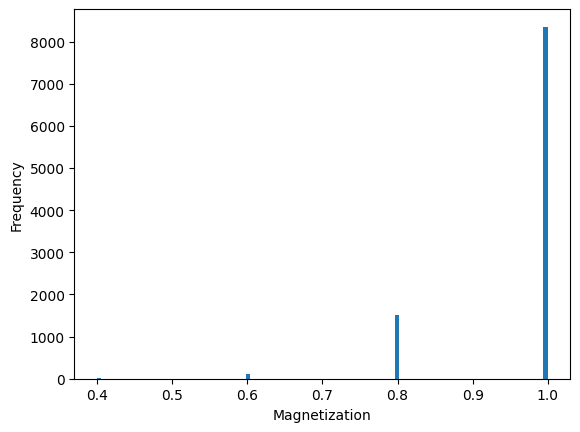

In [112]:
# plot histogram of magnetization
plt.hist(magnetization, bins=100)
plt.xlabel("Magnetization")
plt.ylabel("Frequency")
plt.show()

